In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: ylabel='Density'>

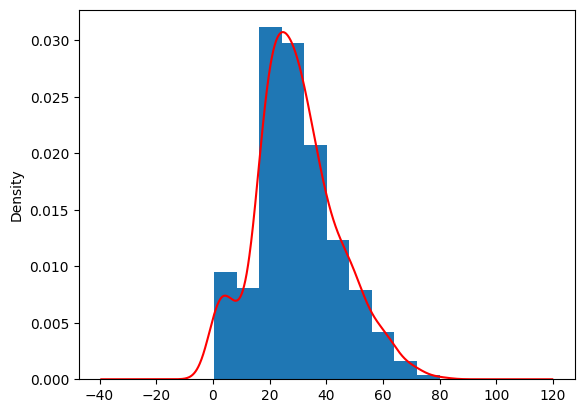

In [6]:
axces = train_data['Age'].hist(bins = 10, density =True)
train_data['Age'].plot(kind = 'density', color = 'red')

In [7]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='count'>

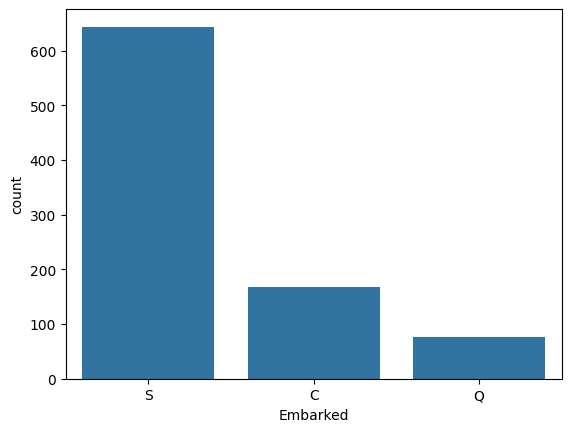

In [8]:
sns.countplot(x = "Embarked", data = train_data)

<Axes: xlabel='Pclass', ylabel='count'>

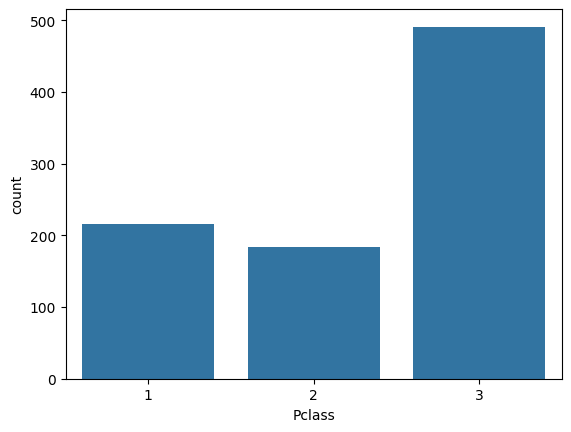

In [9]:
sns.countplot(x = "Pclass", data = train_data)

In [10]:
#1. fill zero -> mean will be shifted
#2. Mean
#3. median
#4. Mode
all_data = train_data.copy()
train_data['Age'].fillna(train_data['Age'].median(), inplace= True)
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace= True)

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: ylabel='Density'>

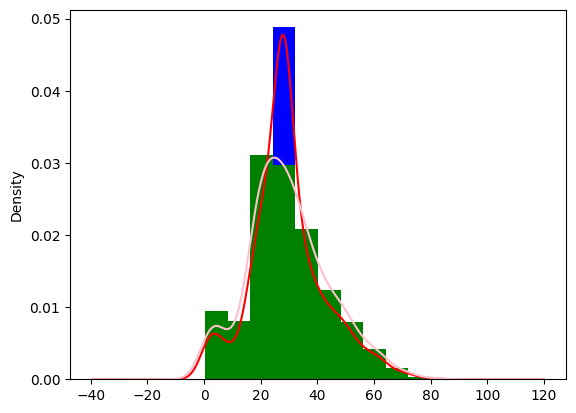

In [12]:
axces = train_data['Age'].hist(bins = 10, density =True, color = 'Blue')
train_data['Age'].plot(kind = 'density', color = 'red')

axces = all_data['Age'].hist(bins = 10, density =True, color = 'green')
all_data['Age'].plot(kind = 'density', color = 'pink')

In [13]:
# Combine two columns with based on condition
train_data['Travel_Alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [14]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Travel_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [15]:
train_data.drop(['SibSp', 'Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True )

In [16]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel_Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


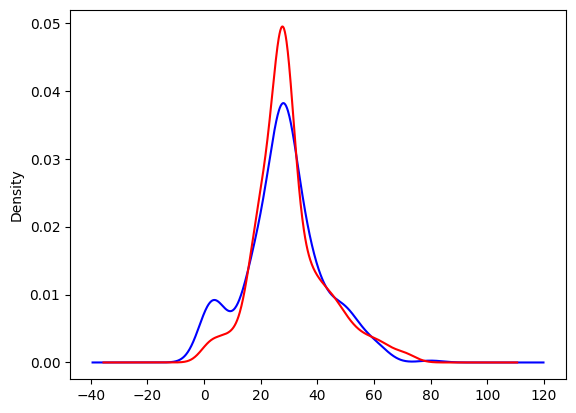

In [17]:
axes = train_data['Age'][train_data.Survived == 1].plot(kind = 'density', color = 'Blue')
axes = train_data['Age'][train_data.Survived == 0].plot(kind = 'density', color = 'red')

<Axes: xlabel='Age', ylabel='Density'>

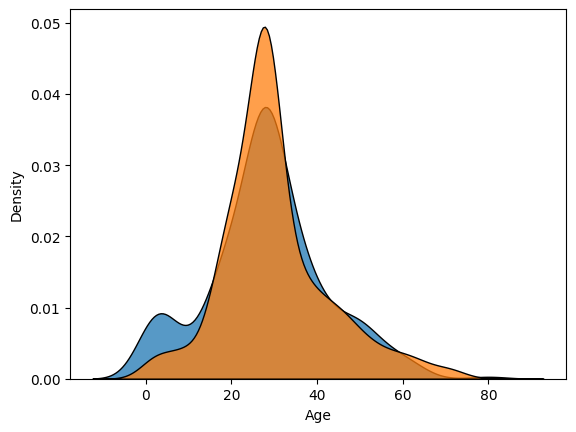

In [18]:
sns.kdeplot(train_data['Age'][train_data.Survived == 1], multiple='stack')
sns.kdeplot(train_data['Age'][train_data.Survived == 0], multiple='stack')

In [19]:
# Now converl all string into int 
train_data  = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

In [20]:
train_data

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,False,True,False,False,True
1,1,1,38.0,71.2833,0,True,False,True,False,False
2,1,3,26.0,7.9250,1,True,False,False,False,True
3,1,1,35.0,53.1000,0,True,False,False,False,True
4,0,3,35.0,8.0500,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,False,True,False,False,True
887,1,1,19.0,30.0000,1,True,False,False,False,True
888,0,3,28.0,23.4500,0,True,False,False,False,True
889,1,1,26.0,30.0000,1,False,True,True,False,False


In [21]:
# Now Place 1 at the place of True
train_data['Sex_male'] = np.where(train_data['Sex_male'] == True, 1, 0)
train_data['Sex_female'] = np.where(train_data['Sex_female'] == True, 1, 0)

train_data['Embarked_C'] = np.where(train_data['Embarked_C'] == True, 1, 0)
train_data['Embarked_Q'] = np.where(train_data['Embarked_Q'] == True, 1, 0)
train_data['Embarked_S'] = np.where(train_data['Embarked_S'] == True, 1, 0)


In [22]:
train_data

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,0,0,1
887,1,1,19.0,30.0000,1,1,0,0,0,1
888,0,3,28.0,23.4500,0,1,0,0,0,1
889,1,1,26.0,30.0000,1,0,1,1,0,0


<Axes: xlabel='Fare', ylabel='Density'>

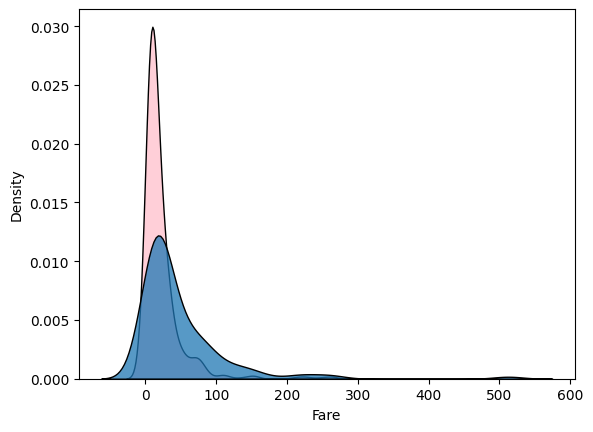

In [23]:
sns.kdeplot(train_data['Fare'][train_data.Survived == 0], multiple='stack', color = 'Pink')
sns.kdeplot(train_data['Fare'][train_data.Survived == 1], multiple='stack')

<Axes: xlabel='Pclass', ylabel='Survived'>

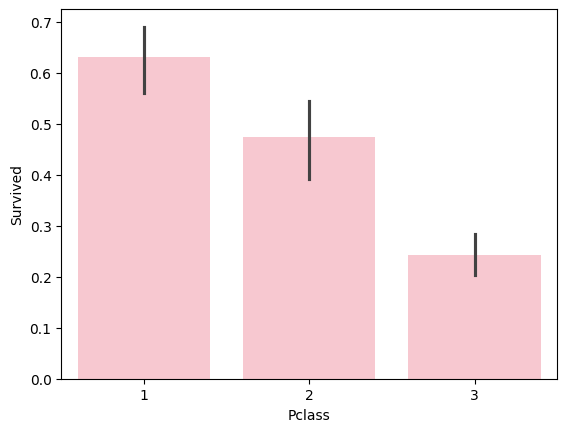

In [24]:
sns.barplot(data = train_data, x = 'Pclass', y = 'Survived', color = 'Pink')

<Axes: xlabel='Sex', ylabel='Pclass'>

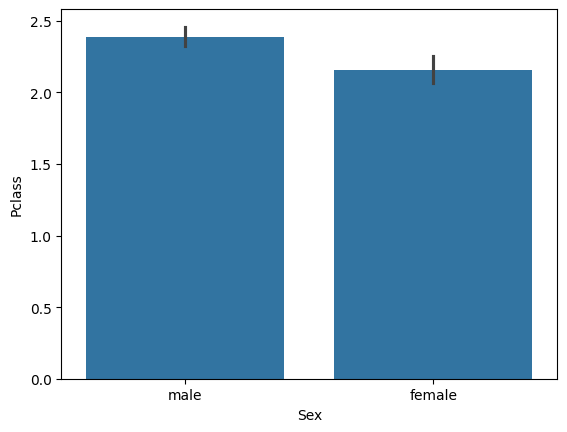

In [25]:
sns.barplot(data = all_data, x = 'Sex', y = 'Pclass')

<Axes: xlabel='Embarked', ylabel='Survived'>

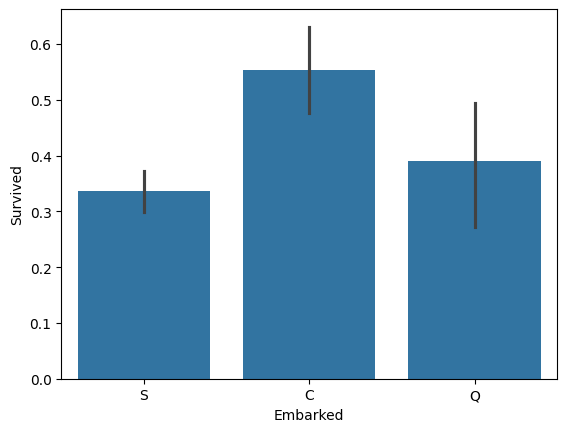

In [26]:
sns.barplot(data = all_data, x = 'Embarked', y = 'Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

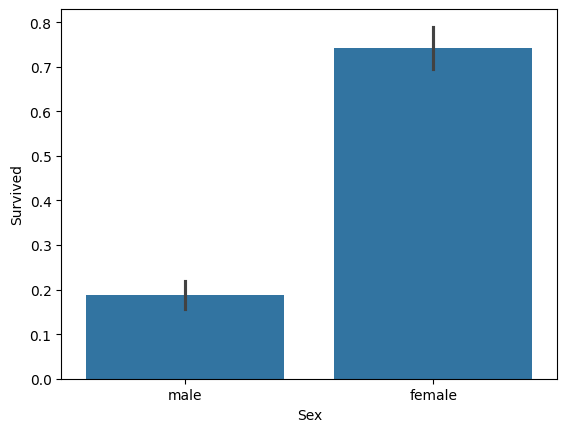

In [27]:
sns.barplot(data = all_data, x = 'Sex', y = 'Survived')

<Axes: xlabel='Travel_Alone', ylabel='Survived'>

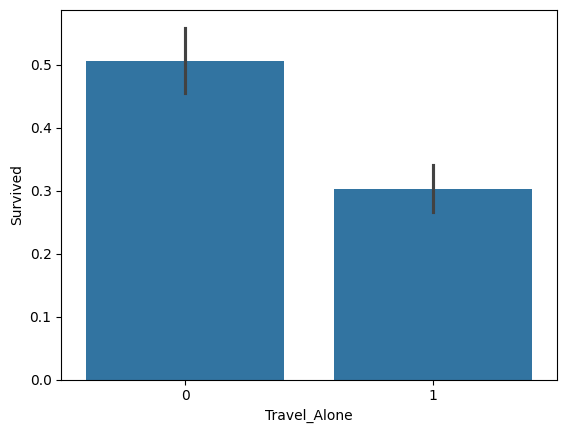

In [28]:
sns.barplot(data = train_data, x = 'Travel_Alone', y = 'Survived')

<Axes: xlabel='Sex', ylabel='Fare'>

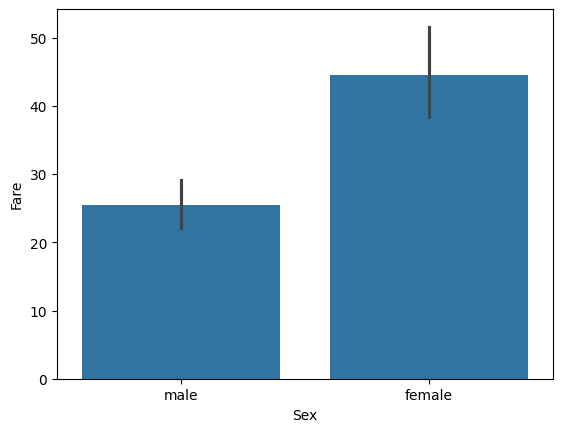

In [29]:
sns.barplot(data = all_data, x = 'Sex', y = 'Fare')

<Axes: >

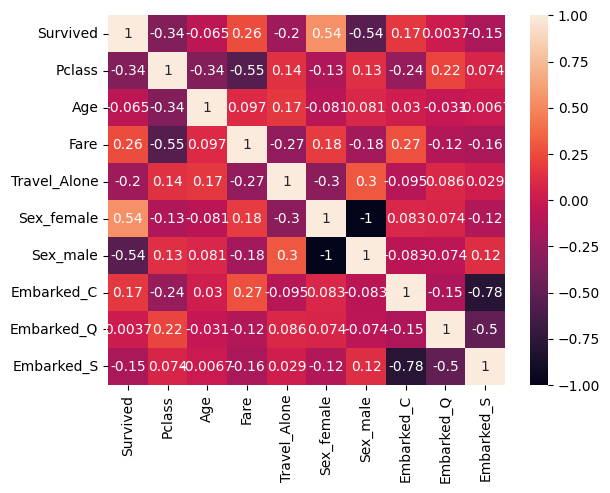

In [30]:
# Heatmap graph
sns.heatmap(train_data.corr(), annot = True)

In [31]:
train_data

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,0,0,1
887,1,1,19.0,30.0000,1,1,0,0,0,1
888,0,3,28.0,23.4500,0,1,0,0,0,1
889,1,1,26.0,30.0000,1,0,1,1,0,0


In [32]:
label = train_data['Survived']

In [33]:
train_data.drop(['Survived'],axis = 1, inplace=True)

In [34]:
label = label.values
train_data = train_data.values

In [35]:
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)
train_data = (train_data - mean)/std

In [36]:
train_data.shape

(891, 9)

In [37]:
#train_data.drop(['Survived'],axis = 1, inplace=True)

In [38]:
#train_data

In [39]:
split = 0.8

X_train = train_data[:int(split*train_data.shape[0]), :]
X_test = train_data[int(split*train_data.shape[0]):, :]


Y_train = label[:int(split*label.shape[0])]
Y_test = label[int(split*label.shape[0]):]

In [40]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [41]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))

ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

In [42]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [43]:
 def sigmoid(X):
     return 1/(1 + np.exp(-X))

In [44]:
 def sigmoid(X):
     return 1/(1 + np.exp(-X))

In [45]:
def hypothesis(X, weight):
    return sigmoid(np.dot(X, weight))

In [46]:
def loss(X, Y, weight):
    y_p = hypothesis(X, weight)
    loss = np.mean(Y * np.log(y_p) + (1-Y) * np.log(1- y_p))
    return -1 * loss

In [47]:
def gradient(X, Y, weight):
    y_p = hypothesis(X, weight)
    grad = np.dot(X.T, (Y- y_p))
    return grad/X.shape[0]

In [48]:
def gradient_descent(X, Y):
    epochs = 300000
    lr_rate = 0.03
    cost = []
    weight = np.zeros((X.shape[1],))
    
    for i in range(epochs):
        cost.append(loss(X, Y, weight))
        grad = gradient(X, Y, weight)
        print(f'On:{i}', end = '\r')
        weight = weight + lr_rate * grad
        
    return weight, cost

In [49]:
weight, cost = gradient_descent(X_train, Y_train)

In [50]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [51]:
cost

[0.6931471805599453,
 0.6870272475604037,
 0.6811178919843985,
 0.6754113911031046,
 0.6699002463221,
 0.6645771864417214,
 0.6594351694688062,
 0.6544673831267532,
 0.6496672442075776,
 0.6450283969044248,
 0.64054471025628,
 0.6362102748287642,
 0.6320193987463285,
 0.6279666031821297,
 0.6240466174026842,
 0.6202543734552438,
 0.6165850005769169,
 0.6130338193959723,
 0.6095963359876326,
 0.6062682358390389,
 0.6030453777709969,
 0.5999237878576135,
 0.5968996533790001,
 0.5939693168368528,
 0.5911292700579002,
 0.58837614840589,
 0.5857067251189707,
 0.5831179057859435,
 0.5806067229719023,
 0.5781703310011927,
 0.5758060009033877,
 0.5735111155260433,
 0.5712831648163461,
 0.569119741272364,
 0.5670185355634179,
 0.5649773323181084,
 0.5629940060777064,
 0.5610665174119418,
 0.5591929091936886,
 0.5573713030286085,
 0.5555998958354866,
 0.5538769565727423,
 0.5522008231064232,
 0.5505698992148728,
 0.5489826517251986,
 0.5474376077766481,
 0.5459333522060118,
 0.5444685250502238,


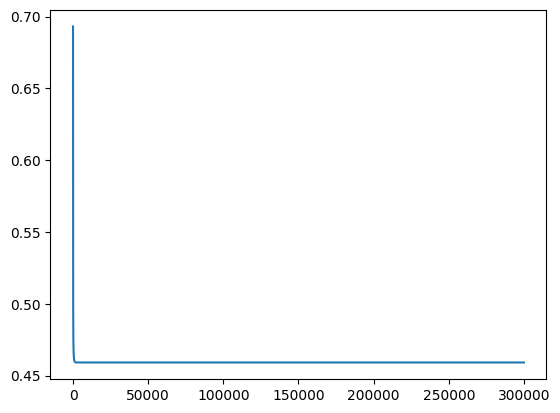

In [52]:
plt.plot(cost)

In [53]:
weight.shape

(10,)

In [62]:
corr = 0
for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i],weight )
    print(pred)
    if pred > 0.5:
        pred = 1
        if pred == Y_test[i]:
            corr += 1
    else:
        pred = 0
        if pred == Y_test[i]:
            corr += 1
            

0.3106363377551462
0.08501890805863153
0.1314239646194131
0.11053829681956533
0.9158981488244999
0.8063134101044552
0.1381899891591387
0.07664886200806277
0.8671517559749168
0.10441123719481908
0.20264418732254033
0.13814216934216927
0.45171462369600984
0.10759531416353131
0.7688966100772596
0.6838863565076255
0.22236773995347908
0.5522750306450054
0.9029755968447996
0.19294761355057885
0.23541038183284038
0.25866074949547474
0.25866074949547474
0.08538866512759324
0.3795687221428383
0.3699811248935303
0.0874718456353937
0.0874718456353937
0.4833942125364683
0.37974480793162546
0.9372846222170302
0.08595776104145639
0.08081133546539072
0.18866552388201632
0.10530694161968442
0.7918563239375086
0.509182345235064
0.12948509009027576
0.8752532121165625
0.13703348413317645
0.07647079591407585
0.09967394174606871
0.6500524160875767
0.3695410011564967
0.08748350093167473
0.28767526792919773
0.07460685934246993
0.9086920859589886
0.08670520848507583
0.061901846520753215
0.15797375877310327
0.

In [60]:
corr

144

In [61]:
corr/X_test.shape[0]

0.8044692737430168